In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Create a set of random latitude and longtitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
import requests
#requests.__version__
# Import the API keys
from config import weather_api_key
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginnng Data Retrieval    ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set number and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is exerienced, skip the city.
    except:
        print(f"City '{city}' not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginnng Data Retrieval    
---------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | taolanaro
City 'taolanaro' not found. Skipping...
Processing Record 9 of Set 1 | ceres
Processing Record 10 of Set 1 | pimentel
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | rioja
Processing Record 14 of Set 1 | shimoda
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | chimbote
Processing Record 18 of Set 1 | sorong
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | ina
Processing Record 22 of Set 1 | carutapera
Processing Record 2

Processing Record 37 of Set 4 | zapolyarnyy
Processing Record 38 of Set 4 | sisimiut
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | bandar-e lengeh
Processing Record 41 of Set 4 | burica
City 'burica' not found. Skipping...
Processing Record 42 of Set 4 | corvallis
Processing Record 43 of Set 4 | ust-kuyga
Processing Record 44 of Set 4 | sakakah
Processing Record 45 of Set 4 | kargasok
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | pachora
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | veraval
Processing Record 1 of Set 5 | safaga
Processing Record 2 of Set 5 | falealupo
City 'falealupo' not found. Skipping...
Processing Record 3 of Set 5 | papara
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | bud
Processing Record 7 of Set 5 | mandalgovi
Processing Record 8 of Set 5 | viligili
City 'viligil

Processing Record 20 of Set 8 | banmo
City 'banmo' not found. Skipping...
Processing Record 21 of Set 8 | campechuela
Processing Record 22 of Set 8 | benton
Processing Record 23 of Set 8 | cascais
Processing Record 24 of Set 8 | hangu
Processing Record 25 of Set 8 | gubbi
Processing Record 26 of Set 8 | miami
Processing Record 27 of Set 8 | campo largo
Processing Record 28 of Set 8 | auki
Processing Record 29 of Set 8 | suhbaatar
Processing Record 30 of Set 8 | paros
Processing Record 31 of Set 8 | srednekolymsk
Processing Record 32 of Set 8 | caramay
Processing Record 33 of Set 8 | chalons-en-champagne
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | abeokuta
Processing Record 36 of Set 8 | mirzapur
Processing Record 37 of Set 8 | weymouth
Processing Record 38 of Set 8 | lata
Processing Record 39 of Set 8 | kjopsvik
Processing Record 40 of Set 8 | aquiraz
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | lere
Processing Record 43 of Set 8

Processing Record 50 of Set 11 | kamenskoye
City 'kamenskoye' not found. Skipping...
Processing Record 1 of Set 12 | immokalee
Processing Record 2 of Set 12 | asosa
Processing Record 3 of Set 12 | louisbourg
City 'louisbourg' not found. Skipping...
Processing Record 4 of Set 12 | palmer
Processing Record 5 of Set 12 | roma
Processing Record 6 of Set 12 | andenes
Processing Record 7 of Set 12 | moerai
Processing Record 8 of Set 12 | linhares
Processing Record 9 of Set 12 | george
Processing Record 10 of Set 12 | dalvik
Processing Record 11 of Set 12 | comodoro rivadavia
Processing Record 12 of Set 12 | xai-xai
Processing Record 13 of Set 12 | quatre cocos
Processing Record 14 of Set 12 | ketchikan
Processing Record 15 of Set 12 | langarud
Processing Record 16 of Set 12 | fukue
Processing Record 17 of Set 12 | camopi
Processing Record 18 of Set 12 | morgan city
Processing Record 19 of Set 12 | rodrigues alves
Processing Record 20 of Set 12 | roebourne
Processing Record 21 of Set 12 | mer

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,56.12,97,30,4.70,BR,2020-09-03 06:18:34
1,Hithadhoo,-0.60,73.08,82.42,72,100,11.68,MV,2020-09-03 06:18:34
2,Ilulissat,69.22,-51.10,37.40,74,100,3.36,GL,2020-09-03 06:18:35
3,Bambous Virieux,-20.34,57.76,75.20,78,75,1.12,MU,2020-09-03 06:18:35
4,Hilo,19.73,-155.09,78.80,65,1,3.36,US,2020-09-03 06:18:01
5,Asau,46.43,26.40,64.99,84,89,3.02,RO,2020-09-03 06:18:35
6,Qaanaaq,77.48,-69.36,23.32,77,8,7.09,GL,2020-09-03 06:18:35
7,Ceres,37.59,-120.96,73.40,53,1,10.29,US,2020-09-03 06:17:01
8,Pimentel,-6.84,-79.93,59.58,88,25,9.91,PE,2020-09-03 06:18:36
9,Hermanus,-34.42,19.23,55.00,93,19,7.00,ZA,2020-09-03 06:18:36


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2020-09-03 06:18:34,-24.79,-50.01,56.12,97,30,4.70
1,Hithadhoo,MV,2020-09-03 06:18:34,-0.60,73.08,82.42,72,100,11.68
2,Ilulissat,GL,2020-09-03 06:18:35,69.22,-51.10,37.40,74,100,3.36
3,Bambous Virieux,MU,2020-09-03 06:18:35,-20.34,57.76,75.20,78,75,1.12
4,Hilo,US,2020-09-03 06:18:01,19.73,-155.09,78.80,65,1,3.36
...,...,...,...,...,...,...,...,...,...
571,Chara,RU,2020-09-03 06:20:40,56.91,118.26,67.84,46,1,5.79
572,Ambovombe,MG,2020-09-03 06:20:40,-25.17,46.08,64.56,63,78,13.53
573,Qasigiannguit,GL,2020-09-03 06:20:41,68.82,-51.19,37.40,74,87,3.36
574,Raudeberg,NO,2020-09-03 06:20:41,61.99,5.14,60.01,59,97,28.01


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Visualizations!!

# Extract relevant fields from the Dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed  = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

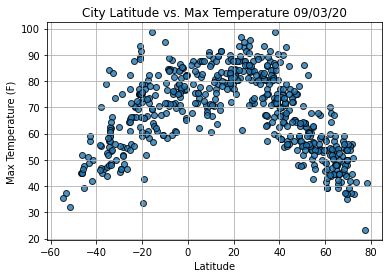

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

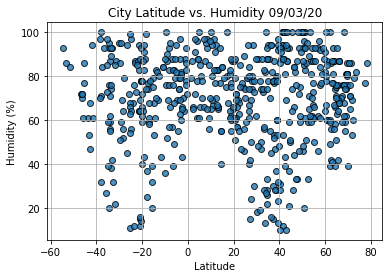

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

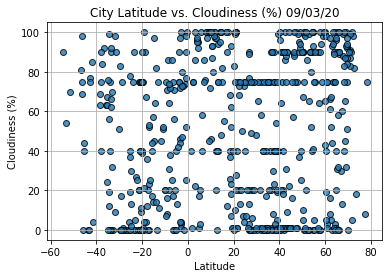

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

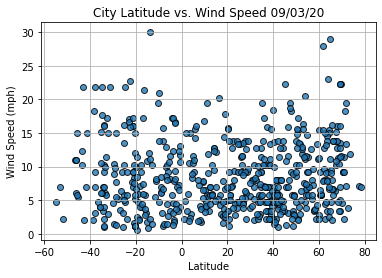

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the test for the line equaltion
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

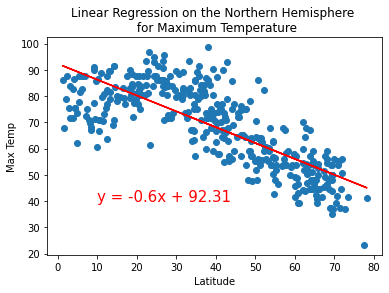

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

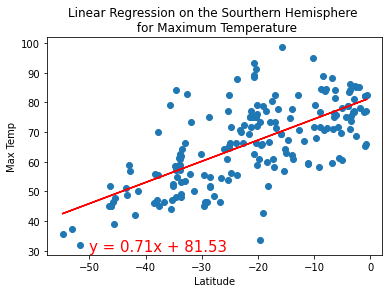

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Sourthern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,30))

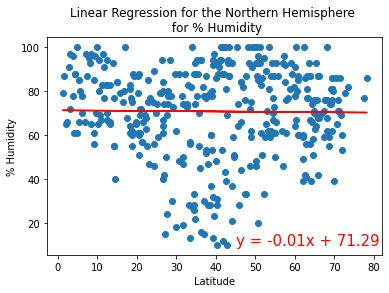

In [35]:
# Linear regression on the Percent Humidity for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Northern Hemisphere \n for % Humidity', '% Humidity', (45,10))

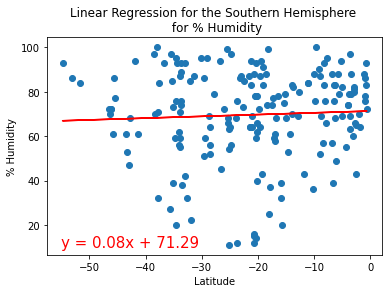

In [46]:
# Linear regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,10))

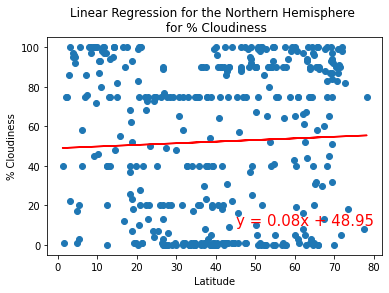

In [47]:
# Linear regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (45,10))

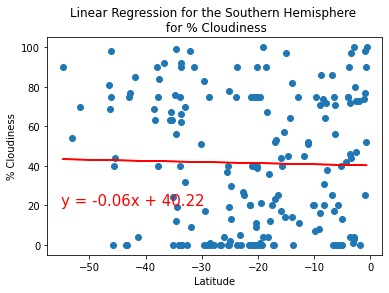

In [49]:
# Linear regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55,20))

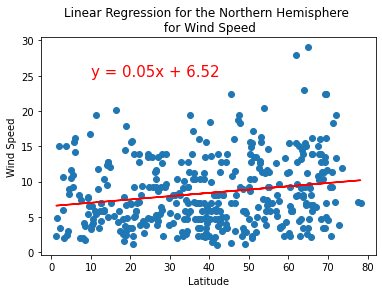

In [53]:
# Linear regression on the Wind Speed for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (10,25))

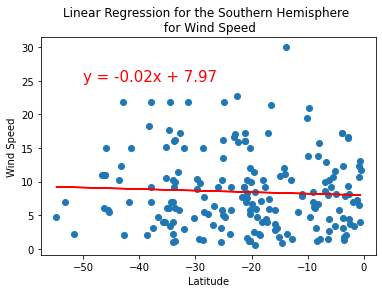

In [55]:
# Linear regression on the Wind Speed for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,25))